# Języki skryptowe w analizie danych - podstawy regresji, `statsmodels`, `seaborn` i `Prophet`
###### dr inż. Marcin Lawnik

> **Regresja** – metoda statystyczna pozwalająca na opisanie współzmienności kilku zmiennych przez dopasowanie do nich funkcji. Umożliwia przewidywanie nieznanych wartości jednych wielkości na podstawie znanych wartości innych. *Wikipedia*

### Liniowy model regresji prostej

**Współczynnik korelacji liniowej Pearsona**
dwóch zmiennych losowych
$X$ i $Y$ definiujemy następująco

$$\rho(X,Y) = \frac{{\bf
Cov}(X,Y)}{\sqrt{{\bf Var}(X){\bf Var}(Y)}},$$
gdzie $Cov(X,Y)$ oznacza kowariację zmiennych losowych X i Y, a $Var(\cdot )$ jest wariancją zmiennej losowej.

Jeśli mamy losową próbkę wartości zmiennych losowych $X$ i $Y$ w postaci punktów $(x_i,\ y_i)\ i=1,\dots n$, to współczynnik korelacji liniowej Pearsona można wyrazić następująco:

$$
r_{xy} = \frac{ \sum\limits_{i=1}^n{(x_i-\overline{x})(y_i-\overline{y})} }{ \sqrt{ \sum\limits_{i=1}^n{(x_i-\overline{x})^2}} \sqrt{ \sum\limits_{i=1}^n{(y_i-\overline{y})^2}} }.
$$

$\overline{x}$ i $\overline{y}$ oznaczają średnią arytmetyczną dla $X$ i $Y$.

Interpretacja $r_{xy}$ jest następująca:
+ $r_{xy} \in [-1,1]$
+ $r_{xy} = -1$: ujemna zależność liniowa (ze wzrostem $x$ maleje $y$)
+ $r_{xy} = 0$: brak zależności liniowej
+ $r_{xy} = 1$: dodatnia zależność liniowa (ze wzrostem $x$ wzrasta $y$)

Kwartet Anscombe'a [https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a](https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a)
![Kwartet Anscombe'a](kwartet.png)

**Prosta regresji:** $\widehat{y}=a_1x+a_0$

**Współczyniki $a$ i $b$ znajdujemy z Metody Najmniejszych Kwadratów (MNK):**

$$
W = \sum\limits_{i=1}^n(y_i-\widehat{y}_i)^2 =  \sum\limits_{i=1}^n(y_i-a_1x_i-a_0)^2
$$

Szukamy takich wartości $a_0$ i $a_1$ aby wyrażenie $W$ osiągnęło wartość najmniejszą.

+ 
$$
\frac{\partial W}{\partial a_0} = 2\sum\limits_{i=1}^n(y_i-a_1x_i-a_0)(-1)
$$
+ 
$$
\frac{\partial W}{\partial a_1}=2\sum\limits_{i=1}^n(y_i-a_1x_i-a_0)(-x_i)
$$

Po przyrównaniu do 0 i wykonaniu elementarnych operacji:
$$
\left \{
\begin{array}{c}
na_0 + a_1\sum\limits_{i=1}^nx_i =\sum\limits_{i=1}^ny_i \\
a_0\sum\limits_{i=1}^nx_i +a_1\sum\limits_{i=1}^nx_i^2 =\sum\limits_{i=1}^nx_iy_i
\end{array}
\right.
$$

Rozwiązaniem układu jest

$$
a_0 = \frac{\sum\limits_{i=1}^ny_i \sum\limits_{i=1}^nx_i^2 -\sum\limits_{i=1}^nx_i\sum\limits_{i=1}^nx_iy_i}{n\sum\limits_{i=1}^nx_i^2 -\left ( \sum\limits_{i=1}^nx_i\right )^2}
$$

$$
a_1 = \frac{n\sum\limits_{i=1}^nx_iy_i -\sum\limits_{i=1}^nx_i\sum\limits_{i=1}^ny_i}{n\sum\limits_{i=1}^nx_i^2 -\left ( \sum\limits_{i=1}^nx_i\right )^2}
$$


Ostatecznie:
+ 
$$
a_0=\overline{y}-a_1\overline{x}
$$
+ 
$$
a_1=\frac{ \sum\limits_{i=1}^n{(x_i-\overline{x})(y_i-\overline{y})} }{  \sum\limits_{i=1}^n{(x_i-\overline{x})^2}}
$$

$\overline{x}$ i $\overline{y}$ oznaczają kolejno średnią arytmetyczną dla wartości $x_i$ i $y_i$.

**Jakość dopasowania modelu: współczynnik determinacji $R^2$**

$$
R^2 = \frac{\sum\limits_{i=1}^n(\widehat{y}_i-\overline{y})^2}{\sum\limits_{i=1}^n(y_i-\overline{y})^2}
$$

Interpretacja: im bliższa wartość $R^2$ jest wartości 1, tym lepiej model opisuje dane.

### Liniowy model regresji wielorakiej

$$
Y_t = b_0X_{0t} + b_1X_{1t} + \cdots + b_mX_{mt} + e_t = \sum\limits_{j=0}^m b_jX_{jt} + e_t,
$$
gdzie:

$Y$ - zmienna objaśniana (zależna)

$X_0,X_1,\dots ,X_m$ - zmienne objaśniające (niezależne)

$b_0,b_1,\dots ,b_m$ - parametry strukturalne

$e$ - składnik losowy

$t=1,\dots ,T$ - numer obserwacji

$j=0,1,\dots ,m$ - numer zmiennej objaśniającej

**Przykład w języku Python**

[https://datatofish.com/multiple-linear-regression-python/](https://datatofish.com/multiple-linear-regression-python/)

### Przykład:

samochody: [https://archive.ics.uci.edu/ml/machine-learning-databases/autos/](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/)

In [1]:
import pandas as pd
dane_sam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', sep=",", header=None)
dane_sam.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
dane_sam.columns = ['symboling','normalized_losses', 'make','fuel_type',                
 'aspiration', 'num_of_doors', 'body_style','drive_wheels','engine_location',          
'wheel_base', 'length','width','height', 'curb_weight', 'engine_type',             
'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',                   
'compression_ratio','horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 
'price']
dane_sam.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
dane_sam.dropna(inplace=True)
dane_sam.replace('?',0, inplace=True)
dane_sam.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [4]:
dane_sam.price = pd.to_numeric(dane_sam["price"])
dane_sam.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

# Pakiet `statsmodels`

> statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

[https://www.statsmodels.org/stable/index.html](https://www.statsmodels.org/stable/index.html)

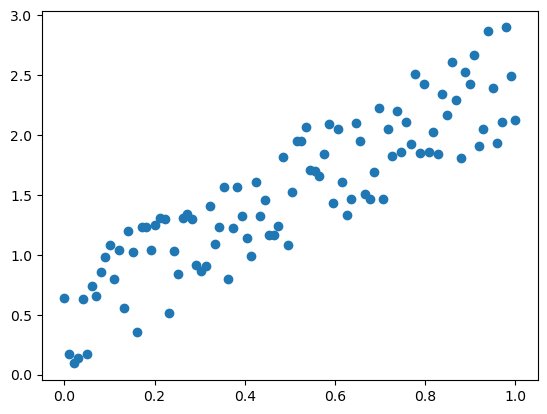

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
y = 2*x + np.random.random(100)

plt.plot(x,y,"o")
plt.show()

In [6]:
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

dane_test = pd.DataFrame(data = [x,y])
dane_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.010101,0.020202,0.030303,0.040404,0.050505,0.060606,0.070707,0.080808,0.090909,...,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1.000000
1,0.634593,0.172185,0.092099,0.134942,0.629109,0.170195,0.740242,0.655378,0.852694,0.980115,...,2.663143,1.910057,2.049006,2.864110,2.394777,1.934408,2.110668,2.896401,2.488642,2.127016


In [7]:
dane_test_ = dane_test.T
dane_test_.columns=["x","y"] 
dane_test_.head()

,x,y
0,0.000000,0.634593
1,0.010101,0.172185
2,0.020202,0.092099
3,0.030303,0.134942
4,0.040404,0.629109


In [8]:
mod = smf.ols(formula='y ~ x', data=dane_test_)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     366.2
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           7.17e-35
Time:                        16:26:23   Log-Likelihood:                -17.871
No. Observations:                 100   AIC:                             39.74
Df Residuals:                      98   BIC:                             44.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5559      0.058      9.582      0.0

#### Kontynuacja samochodów

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.ols(formula='price ~ highway_mpg', data=dane_sam)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     182.1
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.79e-30
Time:                        16:26:23   Log-Likelihood:                -2069.1
No. Observations:                 205   AIC:                             4142.
Df Residuals:                     203   BIC:                             4149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.776e+04   1883.658     20.045      

### Analiza wyników

Interpretacja wartości: [https://datatofish.com/statsmodels-linear-regression/](https://datatofish.com/statsmodels-linear-regression/)

Skorygowany $R^2$: [https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)

# Pakiet `seaborn`

>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[https://seaborn.pydata.org/index.html](https://seaborn.pydata.org/index.html)

**regplot**

[https://seaborn.pydata.org/generated/seaborn.regplot.html](https://seaborn.pydata.org/generated/seaborn.regplot.html)

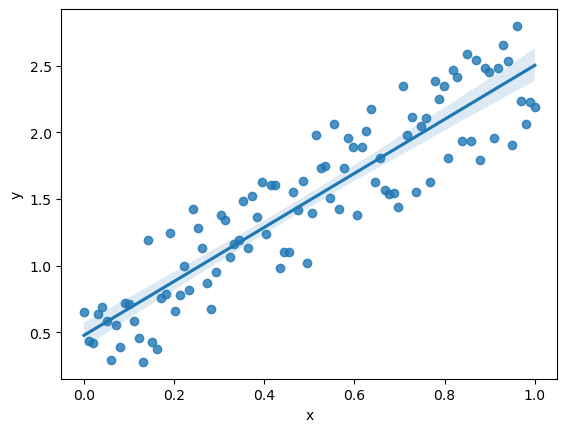

In [10]:
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
y = 2*x + np.random.random(100)

sns.regplot(x=x, y=y, fit_reg=True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

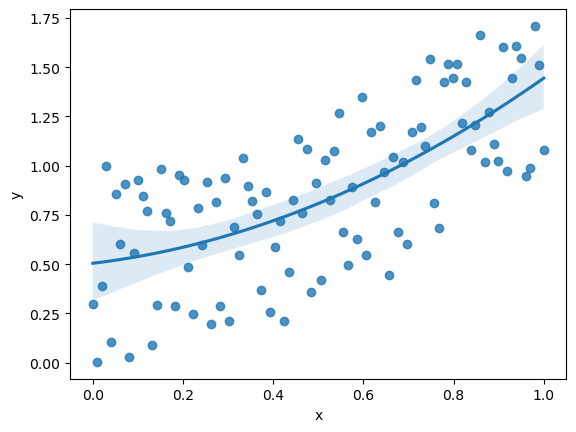

In [11]:
y = np.array(x)**2 + np.random.random(100)

sns.regplot(x=x, y=y, fit_reg=True, order=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Kontynuacja samochodów

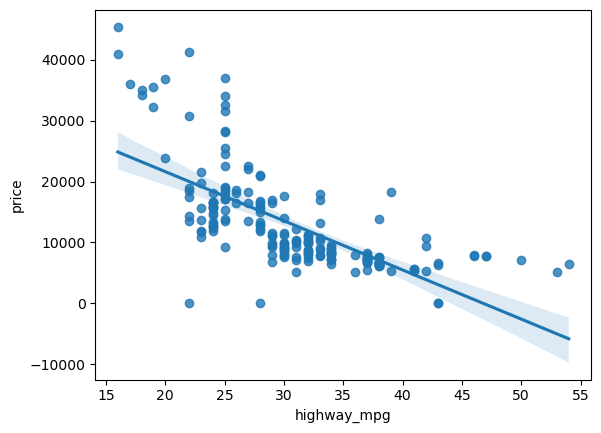

In [12]:
x=dane_sam.price 
y=dane_sam.highway_mpg
sns.regplot(x=y, y=x, fit_reg=True)
plt.ylabel('price')
plt.xlabel('highway_mpg')
plt.show()

**jointplot**

[https://seaborn.pydata.org/generated/seaborn.jointplot.html](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

C:\Users\DeltaM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DeltaM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


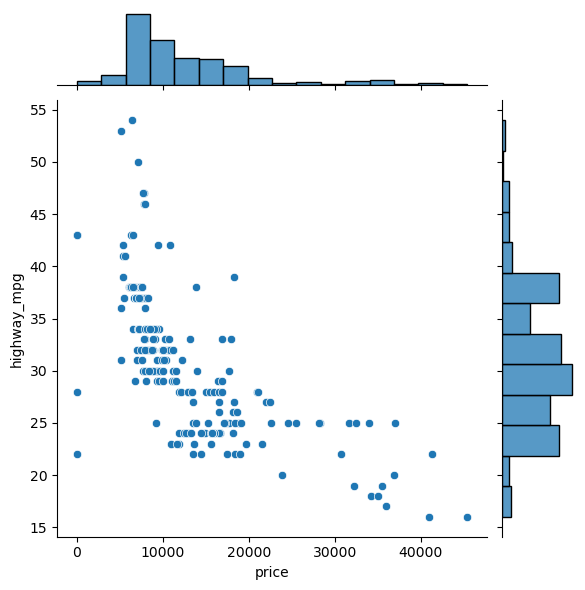

In [13]:
sns.jointplot(x=x, y=y)
plt.show()

**histplot**

[https://seaborn.pydata.org/generated/seaborn.histplot.html](https://seaborn.pydata.org/generated/seaborn.histplot.html)

C:\Users\DeltaM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


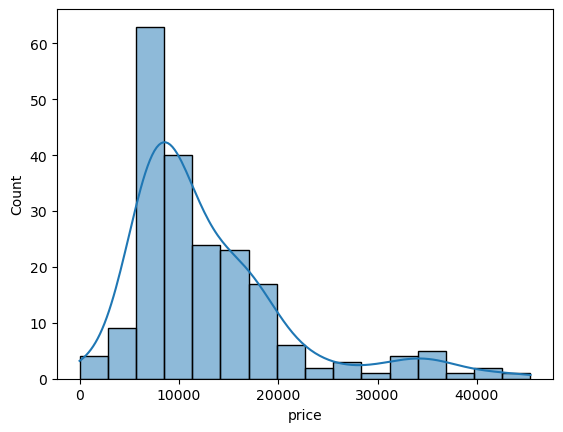

In [14]:
sns.histplot(x, kde=True)
plt.show()

**pairplot**

[https://seaborn.pydata.org/generated/seaborn.pairplot.html](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

C:\Users\DeltaM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DeltaM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


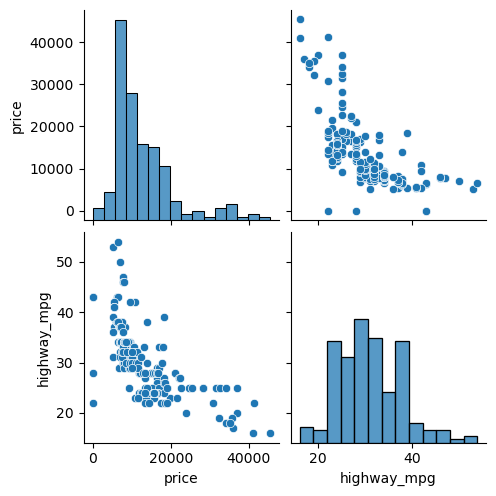

In [15]:
dane = pd.DataFrame(data=[x,y]).T

sns.pairplot(dane)

**boxplot**

[https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

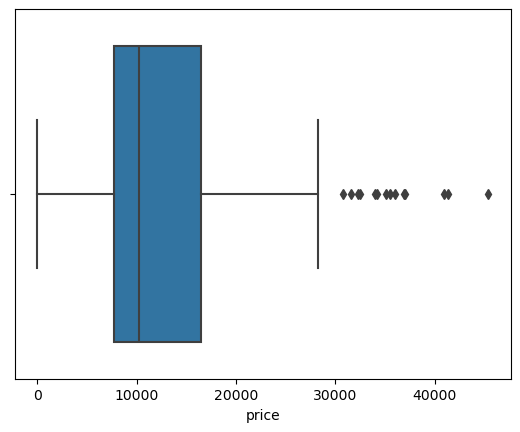

In [16]:
ax = sns.boxplot(x=x)

**heatmap**

[https://seaborn.pydata.org/generated/seaborn.heatmap.html](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

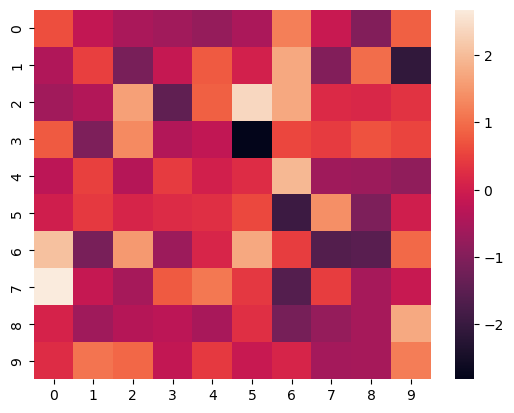

In [17]:
import numpy as np

normal_data = np.random.normal(loc=0.0, scale=1.0, size=(10, 10))
ax = sns.heatmap(normal_data)

plt.show()

# Biblioteka `Prophet`

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

[https://facebook.github.io/prophet/](https://facebook.github.io/prophet/)

# Bilioteka `scikit-learn`

>   + Simple and efficient tools for predictive data analysis
>   + Accessible to everybody, and reusable in various contexts
>   + Built on NumPy, SciPy, and matplotlib
>   + Open source, commercially usable - BSD license

[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

# Biblioteka `bokeh`

[https://bokeh.org/](https://bokeh.org/)

**Dziękuję za uwagę**